# Import

In [36]:
import numpy as np # maths
import matplotlib.pyplot as plt # graphiques

In [37]:
def afficheMat(M):
    print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in M]))
    print('\n')

# 1 - Plus longue sous-séquence commune

In [38]:
def construire_table_lsc(word1,word2):
    l1 = len(word1)+1
    l2 = len(word2)+1
    M = [[0 for i in range(l1)] for j in range(l2)]
    for i in range(1,l2):
        for j in range(1, l1):
            if(word1[j-1] == word2[i-1]):
                val = M[i-1][j-1] + 1
            else :
                val = max(M[i][j-1], M[i-1][j])
            M[i][j] = val
    return M, M[l2-1][l1-1]

### **Quelle est la complexité de cet algorithme ?** <br>
L'algorithme est en O(n)

In [39]:
def choix_chemin_lcs(M,word1,word2):
    plt.figure()
    i = len(word2)
    j = len(word1)
    while i>0 or j>0 :
        M[i][j] = '   X'
        plt.plot(i,j, 'bo')
        if(i==0):
            j = j-1
        elif(j==0):
            i = i - 1
        elif(M[i-1][j] >= M[i][j-1]):
            i = i-1
        else :
            j = j-1
    
    M[i][j] = '   X'
    plt.plot(i,j, 'bo')
    plt.grid()
    plt.show()
    return M

In [40]:
def lsc(word1, word2):
    M,val = construire_table_lsc(word1,word2)
    afficheMat(M)
    print('la plus longue sous-séquence commune est : ',val)
    M2 = choix_chemin_lcs(M,word1,word2)
    afficheMat(M2)

================= Plus longue chaine Sous Commune ========================
   0   0   0   0   0   0
   0   0   1   1   1   1
   0   1   1   1   1   1
   0   1   1   1   2   2
   0   1   1   1   2   2
   0   1   1   2   2   3
   0   1   1   2   3   3


la plus longue sous-séquence commune est :  3


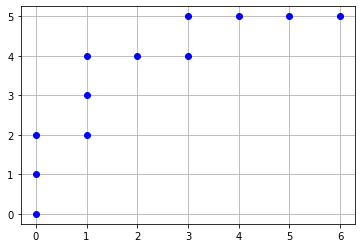

   X   X   X   0   0   0
   0   0   X   X   X   1
   0   1   1   1   X   1
   0   1   1   1   X   X
   0   1   1   1   2   X
   0   1   1   2   2   X
   0   1   1   2   3   X




In [41]:
print('================= Plus longue chaine Sous Commune ========================')
#lsc('neige', 'chien')
lsc('CATGT', 'ACGCTG')

# 2 - Distance de Levenshtein et variantes

In [42]:
cout_sub = {"AC" : 1, "AG" : 2, "AT" : 3, "CG" : 1, "CT" : 2, "GT": 1}

In [43]:
def construire_table_levenshtein(word1,word2):
    l1 = len(word1)+1
    l2 = len(word2)+1
    M = [[0 for i in range(l1)] for j in range(l2)]
    for i in range(l2):
        M[i][0] = i
    for i in range(l1):
        M[0][i] = i
    for i in range(1,l2):
        for j in range(1, l1):
            cout = 0
            if word1[j-1] != word2[i-1] :
                if word1[j-1] + word2[i-1] in cout_sub:
                    cout = cout_sub[word1[j-1] + word2[i-1]]
                else :
                    cout = cout_sub[word2[i-1] + word1[j-1]]
            val = min( min(M[i-1][j-1]+cout, M[i][j-1]+1), M[i-1][j]+1)
            M[i][j] = val
    return M, M[l2-1][l1-1]

In [44]:
def choix_chemin_levenshtein(M,word1,word2):
    plt.figure()
    i = len(word2)
    j = len(word1)
    while i>0 or j>0 :
        M[i][j] = '   X'
        plt.plot(i,j, 'bo')
        if(word1[j-1] == word2[i-1]):
            i = i-1
            j = j-1
        else :
            if(M[i-1][j] < M[i-1][j-1]):
                if(M[i-1][j] < M[i][j-1]):
                    i = i-1
                else :
                    j = j-1
            else:
                if(M[i-1][j-1] < M[i][j-1]):
                    i = i-1
                    j = j-1
                else:
                    j=j-1
    plt.plot(i,j, 'bo')
    M[i][j] = '   X'
    plt.grid()
    plt.show()
    return M

In [45]:
def lenvenshtein(word1, word2):
    M, val = construire_table_levenshtein(word1,word2)
    print('la valeur de levenshtein est : ',val)
    afficheMat(M)
    M = choix_chemin_levenshtein(M,word1,word2)
    afficheMat(M)

================= Algorithme de Levenshtein ========================
la valeur de levenshtein est :  0
   0   1   2   3   4
   1   0   1   2   3
   2   1   0   1   2
   3   2   1   0   1
   4   3   2   1   0




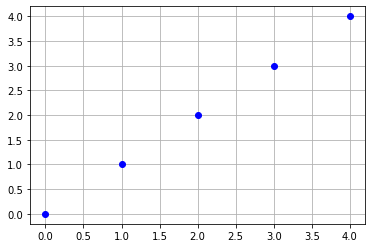

   X   1   2   3   4
   1   X   1   2   3
   2   1   X   1   2
   3   2   1   X   1
   4   3   2   1   X




In [46]:
print('================= Algorithme de Levenshtein ========================')
lenvenshtein('ACGT', 'ACGT')

# 3 - Dynamique Time Warping

In [47]:
# Fonction fileToList écrite par Romann Yvinec avec son accord d'utilisation
def fileToList(file):
    f = open(file)
    text = f.read()
    filteredList = filter(lambda a : a != "",text.split(" "))
    return list(map(float,filteredList))

signal1 = np.linspace(4,20,6)
signal2 = np.linspace(4,20,8)

## Distance Euclidienne

In [48]:
def construire_table_euclidienne(s1, s2):
    l1 = len(s1)
    l2 = len(s2)
    M = [[0 for i in range(l2)] for j in range(l1)]
    for i in range(l1):
        for j in range(l2):
            M[i][j] = np.sqrt((s1[i] - s2[j]) ** 2)
    return M

## Distance Elastique

In [49]:
def mat_dist(s1, s2):
    l1 = len(s1)
    l2 = len(s2)
    D = [[0 for i in range(l2)] for j in range(l1)]
    for i in range(l1):
        for j in range(l2):
            D[i][j] = np.sqrt((s1[i] - s2[j]) ** 2)
            val = 0
            if i > 0 :
                if j > 0 :
                    val = min(D[i-1][j-1] , min(D[i-1][j] , D[i][j-1]))
                else :
                    val = D[i-1][j]
            elif j > 0 :
                    val = D[i][j-1]
            D[i][j] = D[i][j] + val
    return D

In [50]:
def choix_chemin_dtw(M):
    plt.figure()
    j = len(M[0])-1
    i = len(M)-1
    while i > 0 or j > 0 :
        M[i][j] = 'X'
        plt.plot(i,j, 'bo')
        if(M[i-1][j] < M[i-1][j-1]):
            if(M[i-1][j] < M[i][j-1]):
                i = i-1
            else :
                j = j-1
        else:
            if(M[i-1][j-1] < M[i][j-1]):
                i = i-1
                j = j-1
            else:
                j=j-1
    plt.plot(i,j)
    M[i][j] = 'X'
    plt.grid()
    plt.show()
    return M

In [51]:
def calc_sum(s1,s2) :
    M = construire_table_euclidienne(s1,s2)
    res = []
    if len(M[0])-1 == len(M)-1 :
        val = 0
        for i in range(len(M)-1):
            val = val + M[i][i]
            res.append(val)
    return np.asarray(res), val

In [54]:
def dtw(s1, s2):
    print('================= Dynamique Time Warping ========================')
    #print(signal1)
    #print(signal2)
    fc11 = fileToList(s1)
    fc12 = fileToList(s2)
    res = mat_dist(fc11, fc12)
    #print(res)
    #print(calc_sum(fc11,fc12))
    M_choix = choix_chemin_dtw(res)
    #print(np.matrix(M_choix))

================= Dynamique Time Warping ========================


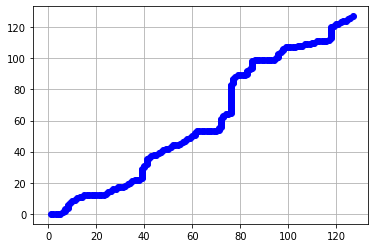

================= Dynamique Time Warping ========================


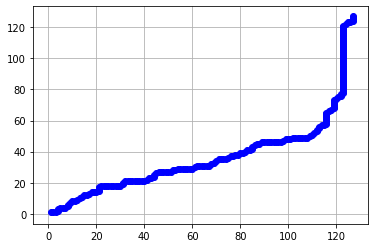

================= Dynamique Time Warping ========================


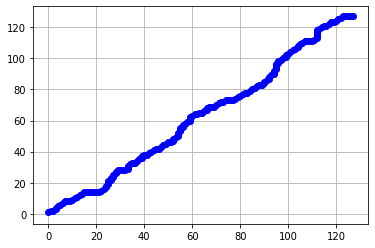

In [55]:
dtw('./DATA_DTW/FC1_1.txt','./DATA_DTW/FC1_2.txt')
dtw('./DATA_DTW/FC2_1.txt','./DATA_DTW/FC2_2.txt')
dtw('./DATA_DTW/FC3_1.txt','./DATA_DTW/FC3_2.txt')

Je ne comprend pas la question 6 de ce TP